<h1><center>Course MA101 - Statistics (ENSTA ParisTech)<center></h1>
<h2><center>Comparison of the convergence of two estimators<center></h2> 

    Author : Nidham Gazagnadou
    
The aim of this notebook is to illustrate the difference between two estimators of the parameter of a uniform distribution. We illustrate their respective convergence and their speed of convergence. This is an illustration of an exercise of the course [MA101](https://synapses.ensta-paristech.fr/catalogue/2018-2019/ue/3564/MA101-introduction-aux-probabilites-et-aux-statistiques)- Statistics at ENSTA ParisTech, Palaiseau.

For any remark or suggestion, please feel free to contact me at: nidham.gazagnadou@telecom-paristech.fr

Last update: June 2nd 2019

## Exercise 3 (Sujet 3)
Let us consider the statistical model $\mathscr{U}_{[0,\theta]}$, with $\theta \in \mathrm{R}^*_+$. Our goal is to estimate the parameter of this uniform distribution $\theta$.

<font color="red">**Question 1**: Give an estimator $\widetilde{\theta}_n$ of $\theta$ using the method of moments.</font>
<br>
Hint: try at the first order.

**<font color="green"> Answer 1:</font>**
$$
\widetilde{\theta}_n := 2 \overline{X}_n \quad \mbox{(moments)}
$$

<font color="red">**Question 2**: Give the maximum likelihood estimator (MLE) $\widehat{\theta}_n$ of $\theta$.</font>


**<font color="green"> Answer 2:</font>**
$$
\widehat{\theta}_n := \max{ \{ X_1, \ldots, X_n \} } \quad \mbox{(EMV)}
$$

<font color="red">**Question 3**: Compare the quadratic risk and the respective speed of convergence of $\widetilde{\theta}_n$ and $\widehat{\theta}_n$.</font>

**<font color="green"> Answer 3:</font>**
<br>
On the one hand, one can show, using the repartition function of $\widetilde{\theta}_n$, that the estimator of the method of the moments converges to **normal distribution** with a speed of $\sqrt{n}$
$$
\sqrt{n} \left(\widetilde{\theta}_n - \theta\right) \xrightarrow[]{\mathcal{L}} \mathcal{N} \left( 0, \frac{\theta^2}{3} \right)
$$ 


On the other hand, using the central limit theorem, the MLE converges to a **negative exponential distribution** with a speed of $n$:
$$
n \left(\theta - \widehat{\theta}_n\right) \xrightarrow[]{\mathcal{L}} \mathcal{E}\left(\frac{1}{\theta}\right)
$$ 

## Simulating the sample

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
theta_seed = 2 # real value of theta
n = 100 # number of samples
sample = np.random.uniform(0, theta_seed, n)

Text(0, 0.5, 'Probability')

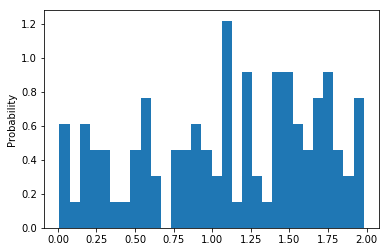

In [3]:
plt.hist(sample, density=True, bins=30) # density
plt.ylabel('Probability')

## Computing our estimators

In [4]:
moment_estimator = 2*np.mean(sample)
mle_estimator = np.max(sample)

print("Method of moments estimator: ", moment_estimator)
print("MLE estimator: ", mle_estimator)

Method of moments estimator:  2.200026394735043
MLE estimator:  1.9811214787300033


## Visualization of the MLE 

In [5]:
def uniform_loglik(theta, sample):
    n = np.size(sample)
    max_theta = np.max(sample)
    if theta >= max_theta:
        likelihood = -n*np.log(theta) 
    else:
        likelihood = np.NaN
    return likelihood

vec_uniform_loglik = np.vectorize(uniform_loglik, excluded=['sample'])

uniform_loglik(3.0, sample) # testing

-109.86122886681098

In [6]:
grid_theta = np.arange(0, 5, 0.001)
loglik = vec_uniform_loglik(theta=grid_theta, sample=sample)
loglik[np.isnan(loglik)] = 1.2*np.nanmin(loglik) # replacing NaN values by minimum for plotting issues

Text(0.5, 1.0, 'MLE estimator')

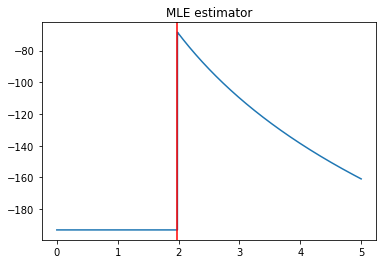

In [7]:
plt.plot(grid_theta, loglik)
plt.axvline(x=mle_estimator, color="red")
plt.title("MLE estimator")

## Simulating several samples of increasing size

In [8]:
N = 10000
sub_index = int(N/2) # keeping only the last N/2 samples to verify the convergence in law
number_samples = np.arange(1, N, 1) # grid of the number of samples
samples = [np.random.uniform(0, theta_seed, n) for n in number_samples]

## Convergence of the estimator of the first moment

Let us verify that
$$
\sqrt{n} \left(\widetilde{\theta}_n - \theta\right) \xrightarrow[]{\mathcal{L}} \mathcal{N} \left( 0, \frac{\theta^2}{3} \right)
$$ 

In [9]:
moment_estimators = [2*np.mean(sample) for sample in samples]

# \sqrt{n}(\widehat{\theta} - \theta) 
moment_convergence = [np.sqrt(number_samples[i])*(moment_estimators[i] - theta_seed) for i in range(np.size(number_samples))]

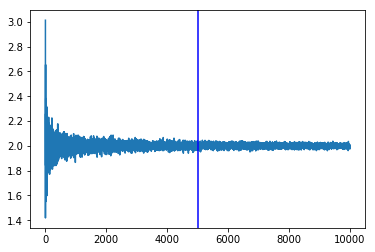

In [10]:
plt.plot(number_samples, moment_estimators);
plt.axvline(x=sub_index, color="blue");

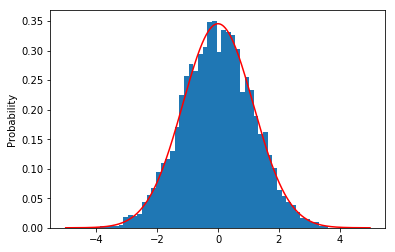

In [11]:
x_val = np.arange(-5, 5, 0.01)
sigma2 = (theta_seed**2)/3
normal_density = (1.0/np.sqrt(2*np.pi*sigma2))*np.exp(-0.5*(x_val**2/sigma2))

plt.hist(moment_convergence[-sub_index:], density=True, bins=50); # density
plt.plot(x_val, normal_density, color="red");
plt.ylabel('Probability');

## Convergence of the estimator of the first moment

Let us verify that
$$
n \left(\theta - \widehat{\theta}_n\right) \xrightarrow[]{\mathcal{L}} \mathcal{E}\left(\frac{1}{\theta}\right)
$$

In [12]:
mle_estimators = [np.max(sample) for sample in samples]

# n(\theta - \widehat{\theta}) 
mle_convergence = [number_samples[i]*(theta_seed - mle_estimators[i]) for i in range(np.size(number_samples))]

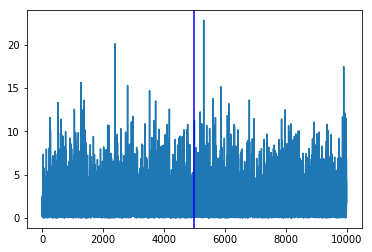

In [13]:
plt.plot(number_samples, mle_convergence);
plt.axvline(x=sub_index, color="blue");

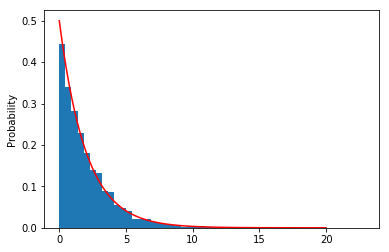

In [14]:
x_val = np.arange(0, 20, 0.01)
exp_density = (1.0/theta_seed)*np.exp(-x_val/theta_seed)

plt.hist(mle_convergence[-sub_index:], density=True, bins=50); # density
plt.plot(x_val, exp_density, color="red");
plt.ylabel('Probability');